In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
alpha0 = .45
sample_size = 20
var = np.sqrt((1-alpha0**2)/sample_size)

alpha_ses = np.maximum(np.zeros(1000), np.random.normal(alpha0, var, 1000))
np.mean(np.square(alpha_ses - alpha0))

0.04111147577371597

In [16]:
penalty = 1

alpha_ses = np.maximum(np.zeros(1000), np.random.normal(alpha0-(penalty/sample_size), var, 1000))
np.mean(np.square(alpha_ses - alpha0))

0.0402621981730381

In [87]:
sample_size = 20
small_mse_df = pd.DataFrame(columns = ['alpha0','penalty','mse'])
errors = np.random.normal(0,1,10000)
i=0
                            
for alpha0 in np.linspace(.1,.5,5):
    sd = np.sqrt((1-alpha0**2)/sample_size)
    
    for penalty in np.linspace(0,8,50):
        alpha = np.maximum(np.zeros(10000), (alpha0 - (penalty/sample_size))+ sd*errors)
        small_mse_df.loc[i] = [alpha0, penalty, np.mean(np.square(alpha - alpha0)) ]
        i = i+1

In [88]:
sample_size = 50
big_mse_df = pd.DataFrame(columns = ['alpha0','penalty','mse'])
errors = np.random.normal(0,1,10000)
i=0
                            
for alpha0 in np.linspace(.1,.5,5):
    sd = np.sqrt((1-alpha0**2)/sample_size)
    
    for penalty in np.linspace(0,8,50):
        alpha = np.maximum(np.zeros(10000), (alpha0 - (penalty/sample_size))+ sd*errors)
        big_mse_df.loc[i] = [alpha0, penalty, np.mean(np.square(alpha - alpha0)) ]
        i = i+1

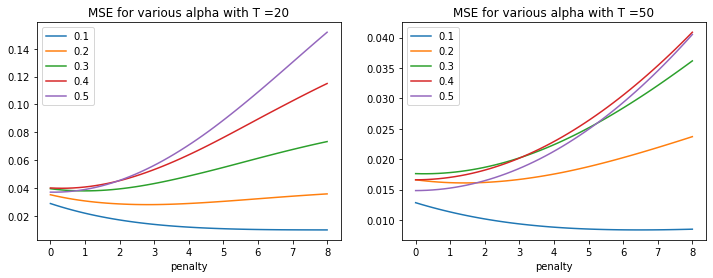

In [96]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (12,4))
for a_val in small_mse_df['alpha0'].unique():
    small_mse_df.query('alpha0 == @a_val').set_index('penalty')['mse'].plot(ax = ax1)
    
ax1.legend( np.round( small_mse_df['alpha0'].unique(),2 ) )
ax1.set_title('MSE for various alpha with T =20')

for a_val in big_mse_df['alpha0'].unique():
    big_mse_df.query('alpha0 == @a_val').set_index('penalty')['mse'].plot(ax = ax2)
    
ax2.set_title('MSE for various alpha with T =50')
ax2.legend( np.round( big_mse_df['alpha0'].unique(),2 ) )